In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load(n,target_df):
    deit = pd.read_csv(f'../../networks/birds_deit/inference_time/n{n}.csv',sep=';')
    levit = pd.read_csv(f'../../networks/birds_levit/inference_time/n{n}.csv',sep=';')
    effnet = pd.read_csv(f'../../networks/birds_effnet/inference_time/n{n}.csv',sep=';')
    
    df[f'deit_cpu_{n}'] = deit['cpu'] / n
    df[f'deit_gpu_{n}'] = deit['gpu'] / n
    df[f'levit_cpu_{n}'] = levit['cpu'] / n
    df[f'levit_gpu_{n}'] = levit['gpu'] / n
    df[f'effnet_cpu_{n}'] = effnet['cpu'] / n
    df[f'effnet_gpu_{n}'] = effnet['gpu'] / n

In [3]:
df = pd.DataFrame()
for i in range(1,17):
    load(i,df)

sel_columns_gpu = ['deit_gpu_16','levit_gpu_16','effnet_gpu_16']
sel_columns_cpu = ['deit_cpu_16','levit_cpu_16','effnet_cpu_16']

In [4]:
cpu_mean = df[sel_columns_cpu].mean()
cpu_mean

cpu_median = df[sel_columns_cpu].median()

print(cpu_mean)
print()
print(cpu_median)

deit_cpu_16      0.035162
levit_cpu_16     0.011296
effnet_cpu_16    0.029313
dtype: float64

deit_cpu_16      0.035038
levit_cpu_16     0.011132
effnet_cpu_16    0.029081
dtype: float64


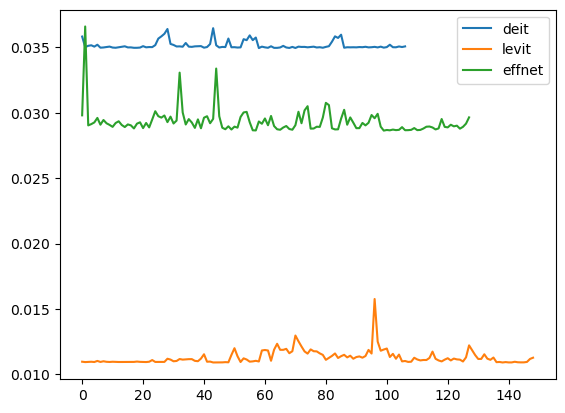

In [5]:
plt.plot(df[sel_columns_cpu])
plt.legend(['deit','levit','effnet'])
#plt.axhline(cpu_median['deit_cpu'],color='blue')
#plt.axhline(cpu_median['levit_cpu'],color='orange')
#plt.axhline(cpu_median['effnet_cpu'],color='green')

Text(0, 0.5, 'Anz. Ergebnisse')

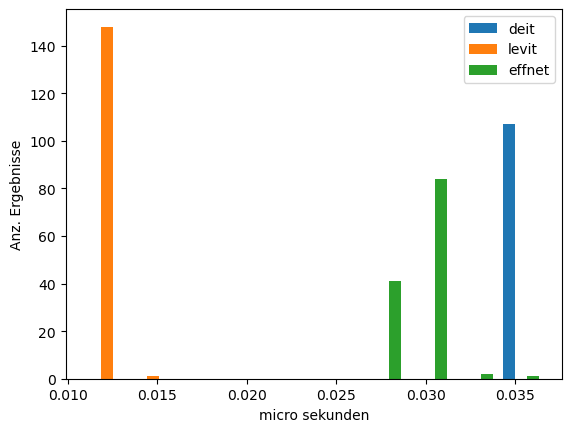

In [6]:
plt.hist(df[sel_columns_cpu])
plt.legend(['deit','levit','effnet'])
plt.xlabel('micro sekunden')
plt.ylabel('Anz. Ergebnisse')

In [7]:
gpu_mean = df[sel_columns_gpu].mean()
gpu_median = df[sel_columns_gpu].median()
print(gpu_mean)
print()
print(gpu_median)

deit_gpu_16      0.000734
levit_gpu_16     0.000913
effnet_gpu_16    0.000880
dtype: float64

deit_gpu_16      0.000608
levit_gpu_16     0.000834
effnet_gpu_16    0.000874
dtype: float64


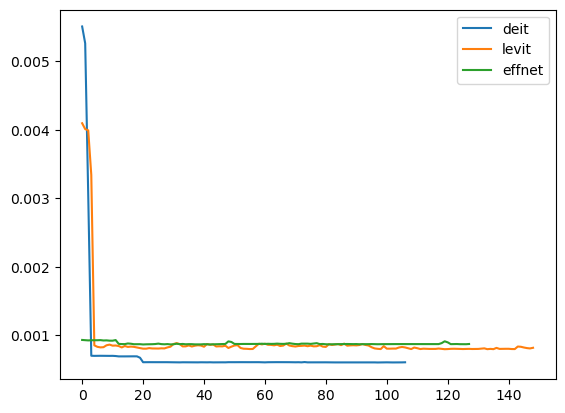

In [8]:
plt.plot(df[sel_columns_gpu])
plt.legend(['deit','levit','effnet'])
#plt.axhline(gpu_median['deit_gpu'],color='blue')
#plt.axhline(gpu_median['levit_gpu'],color='orange')
#plt.axhline(gpu_median['effnet_gpu'],color='green')

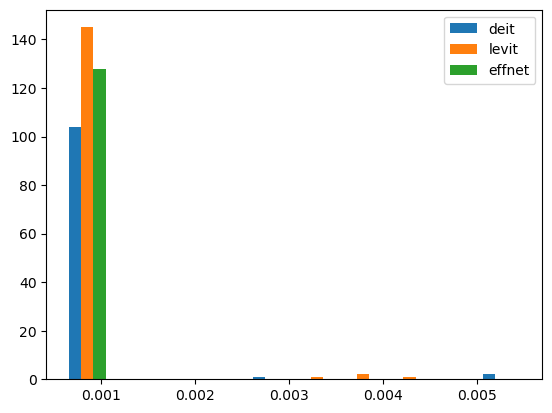

In [9]:
plt.hist(df[sel_columns_gpu])
plt.legend(['deit','levit','effnet'])

In [10]:
def split_df(df, col_str):
    filter_col = [col for col in df if col.startswith(col_str)]
    res = df[filter_col].median()
    
    index = pd.Index(range(1,17))
    res = res.set_axis(pd.Index(index))
    return res

0.035004301785842726
0.035004301785842726
0.035004301785842726


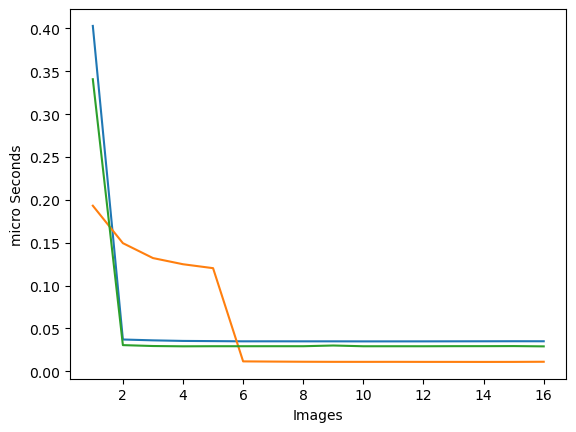

In [11]:
df_deit_cpu = split_df(df,'deit_cpu')
df_deit_gpu = split_df(df,'deit_gpu')
df_levit_cpu = split_df(df,'levit_cpu')
df_levit_gpu = split_df(df,'levit_gpu')
df_effnet_cpu = split_df(df,'effnet_cpu')
df_effnet_gpu = split_df(df,'effnet_gpu')

plt.plot(df_deit_cpu)
plt.plot(df_levit_cpu)
plt.plot(df_effnet_cpu)

plt.xlabel('Images')
plt.ylabel('micro Seconds')

print(df_deit_cpu.median())
print(df_deit_cpu.median())
print(df_deit_cpu.median())

0.0007997500000177084
0.013581193333316654
0.0013333993056474118


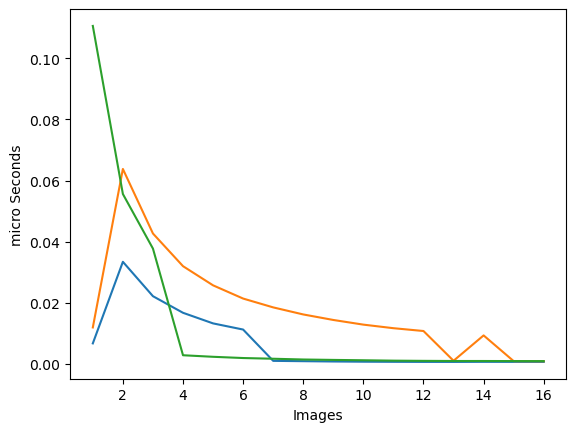

In [12]:
plt.plot(df_deit_gpu)
plt.plot(df_levit_gpu)
plt.plot(df_effnet_gpu)

plt.xlabel('Images')
plt.ylabel('micro Seconds')

print(df_deit_gpu.median())
print(df_levit_gpu.median())
print(df_effnet_gpu.median())

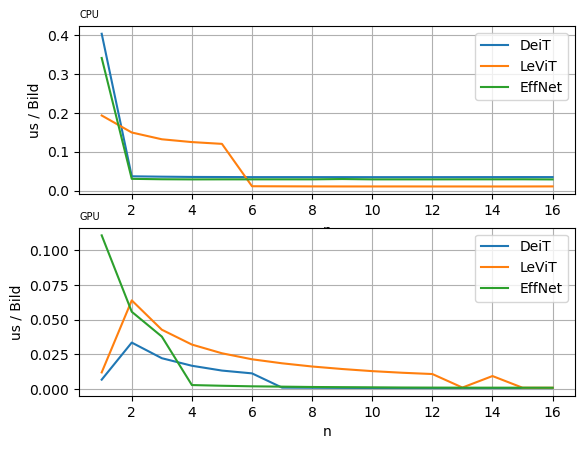

In [13]:
font_size = 7
fig, axs = plt.subplots(2,1)

axs[0].set_title('CPU', fontsize=font_size, loc='left')
axs[0].plot(df_deit_cpu)
axs[0].plot(df_levit_cpu)
axs[0].plot(df_effnet_cpu)
axs[0].set_xlabel('n')
axs[0].set_ylabel('us / Bild')
axs[0].grid(True)
axs[0].legend(['DeiT','LeViT','EffNet'])

axs[1].set_title('GPU', fontsize=font_size, loc='left')
axs[1].plot(df_deit_gpu)
axs[1].plot(df_levit_gpu)
axs[1].plot(df_effnet_gpu)
axs[1].set_xlabel('n')
axs[1].set_ylabel('us / Bild')
axs[1].grid(True)
axs[1].legend(['DeiT','LeViT','EffNet'])

fig.savefig('figs/Inference.jpg')

In [30]:
deit = pd.read_csv(f'../../networks/birds_deit/inference_time/n64.csv',sep=';') / 64
levit = pd.read_csv(f'../../networks/birds_levit/inference_time/n64.csv',sep=';') / 64
effnet = pd.read_csv(f'../../networks/birds_effnet/inference_time/n64.csv',sep=';') / 64

print(deit.median())
print(levit.median())
print(effnet.median())

iteration    0.171875
gpu          0.000546
cpu          0.042594
dtype: float64
iteration    0.648438
gpu          0.000218
cpu          0.011209
dtype: float64
iteration    0.140625
gpu          0.000789
cpu          0.050886
dtype: float64
